In [127]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [128]:
# Gets the name of a dataframe (used when df.name doesn't work)
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [129]:
# Spits out number of missing values for each field in a table
def missing_values(d, n):
    total_missing = d.isnull().sum().sort_values(ascending=False)
    percent_missing = (d.isnull().sum()/d.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'], sort=False)
    print(color.BOLD + get_df_name(d) + ' Missing Values:' + color.END)
    print(missing_data.head(n))

## Bringing the Data In

In [130]:
df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Assurance\call_data.csv', encoding = 'ISO-8859-1')
df

,Agent Experience,Agent ID,Team,Territory,200+Sec Call,Answered,Call ID,Call Start Date,Call Start Time,Call Length (sec),US State of Client,Policy InForce?,Policy Monthly Premium,Policy Submitted?
0,(2) Two Months In,1253,B,Group 2,0,0,20895850,3/31/2018 0:00,5/21/2018 6:48,7,SC,0,0.0,0
1,(2) Two Months In,1226,V,Group 3,0,0,20895762,3/31/2018 0:00,5/21/2018 6:43,27,OH,0,0.0,0
2,(3) Three Months In,1207,C,Group 4,0,0,20895540,3/31/2018 0:00,5/21/2018 6:33,40,OH,0,0.0,0
3,(5) Experienced,192,G,Group 1,0,0,20895346,3/31/2018 0:00,5/21/2018 6:21,15,FL,0,0.0,0
4,(4) Six Months In,719,S,Group 4,0,0,20905993,3/31/2018 0:00,5/21/2018 9:07,23,CA,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481292,(4) Six Months In,948,T,Group 1,0,0,17101114,3/1/2018 0:00,5/21/2018 9:31,24,TX,0,0.0,0
481293,(4) Six Months In,534,P,Group 1,1,1,17103575,3/1/2018 0:00,5/21/2018 9:39,2034,WI,0,0.0,0
481294,(5) Experienced,338,T,Group 1,0,0,17106025,3/1/2018 0:00,5/21/2018 9:48,25,MO,0,0.0,0
481295,(4) Six Months In,1013,T,Group 1,1,1,17108382,3/1/2018 0:00,5/21/2018 9:55,388,LA,0,0.0,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481297 entries, 0 to 481296
Data columns (total 14 columns):
Agent Experience          481297 non-null object
Agent ID                  481297 non-null int64
Team                      481297 non-null object
Territory                 481297 non-null object
200+Sec Call              481297 non-null int64
Answered                  481297 non-null int64
Call ID                   481297 non-null int64
Call Start Date           481297 non-null object
Call Start Time           481297 non-null object
Call Length (sec)         481297 non-null int64
US State of Client        481297 non-null object
Policy InForce?           481297 non-null int64
Policy Monthly Premium    481297 non-null float64
Policy Submitted?         481297 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 51.4+ MB


In [132]:
df['Call Start Time'] = pd.to_datetime(df['Call Start Time'])
df['hour_started'] = df['Call Start Time'].apply(lambda x: x.hour)

df

,Agent Experience,Agent ID,Team,Territory,200+Sec Call,Answered,Call ID,Call Start Date,Call Start Time,Call Length (sec),US State of Client,Policy InForce?,Policy Monthly Premium,Policy Submitted?,hour_started
0,(2) Two Months In,1253,B,Group 2,0,0,20895850,3/31/2018 0:00,2018-05-21 06:48:00,7,SC,0,0.0,0,6
1,(2) Two Months In,1226,V,Group 3,0,0,20895762,3/31/2018 0:00,2018-05-21 06:43:00,27,OH,0,0.0,0,6
2,(3) Three Months In,1207,C,Group 4,0,0,20895540,3/31/2018 0:00,2018-05-21 06:33:00,40,OH,0,0.0,0,6
3,(5) Experienced,192,G,Group 1,0,0,20895346,3/31/2018 0:00,2018-05-21 06:21:00,15,FL,0,0.0,0,6
4,(4) Six Months In,719,S,Group 4,0,0,20905993,3/31/2018 0:00,2018-05-21 09:07:00,23,CA,0,0.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481292,(4) Six Months In,948,T,Group 1,0,0,17101114,3/1/2018 0:00,2018-05-21 09:31:00,24,TX,0,0.0,0,9
481293,(4) Six Months In,534,P,Group 1,1,1,17103575,3/1/2018 0:00,2018-05-21 09:39:00,2034,WI,0,0.0,0,9
481294,(5) Experienced,338,T,Group 1,0,0,17106025,3/1/2018 0:00,2018-05-21 09:48:00,25,MO,0,0.0,0,9
481295,(4) Six Months In,1013,T,Group 1,1,1,17108382,3/1/2018 0:00,2018-05-21 09:55:00,388,LA,0,0.0,0,9


# Exploratory Data Analysis

## A Little Bit of Cleaning

#### Replace any potential whitespace with NaN

In [133]:
df = df.replace(r'^\s*$', np.nan, regex=True)

## Identifying Columns with Missing Data

In [134]:
missing_values(df, 5)

df Missing Values:
                        Total  Percent
hour_started                0      0.0
Policy Submitted?           0      0.0
Policy Monthly Premium      0      0.0
Policy InForce?             0      0.0
US State of Client          0      0.0


#### No missing values!

# Aggregating and Visualizing Data

## Best times for agents to take calls

#### The question is asking me what times our agents should be available to answer calls. But the wording of the "Answered" field description makes me think that it's the agents making the calls to the customers, not the other way around. If agents could both make or answer calls, I'd assume there would be some sort of indicator to tell me which way the call went, so I'll assume it's either one or the other. I'll assume it is indeed the former, and thus will look at some statistics given a call is answered by our agents. However, I'll first looks at some statistics without that condition to look at things like probability the customer answers our agents' calls in case the latter is true.

### Statistics without the condition that a call is answered.

In [135]:
df_time_started = (df.groupby(['hour_started']).agg({'Answered':'mean', 'Call Length (sec)':'mean',
                                                       'Policy Submitted?':'mean', 'Call ID':'count',
                                                    'Policy Monthly Premium':'mean', 'Call Length (sec)':'mean'})
                   .reset_index().rename(columns={'Call ID':'Call Count'}))
df_time_started

,hour_started,Answered,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,0,1.000000,23.000000,0.000000,1,0.000000
1,2,0.500000,14.000000,0.000000,2,0.000000
2,4,0.300000,85.700000,0.200000,10,24.376000
3,5,0.177570,69.008507,0.034747,8346,2.484220
4,6,0.227062,101.737237,0.048139,19215,3.135428
5,7,0.232122,100.251724,0.048872,34232,3.341261
6,8,0.218125,96.014302,0.047193,40133,3.445797
7,9,0.198848,84.977470,0.043802,46870,3.265722
8,10,0.210383,92.903443,0.044996,44937,3.182058
9,11,0.209441,90.989604,0.042688,42518,2.917483


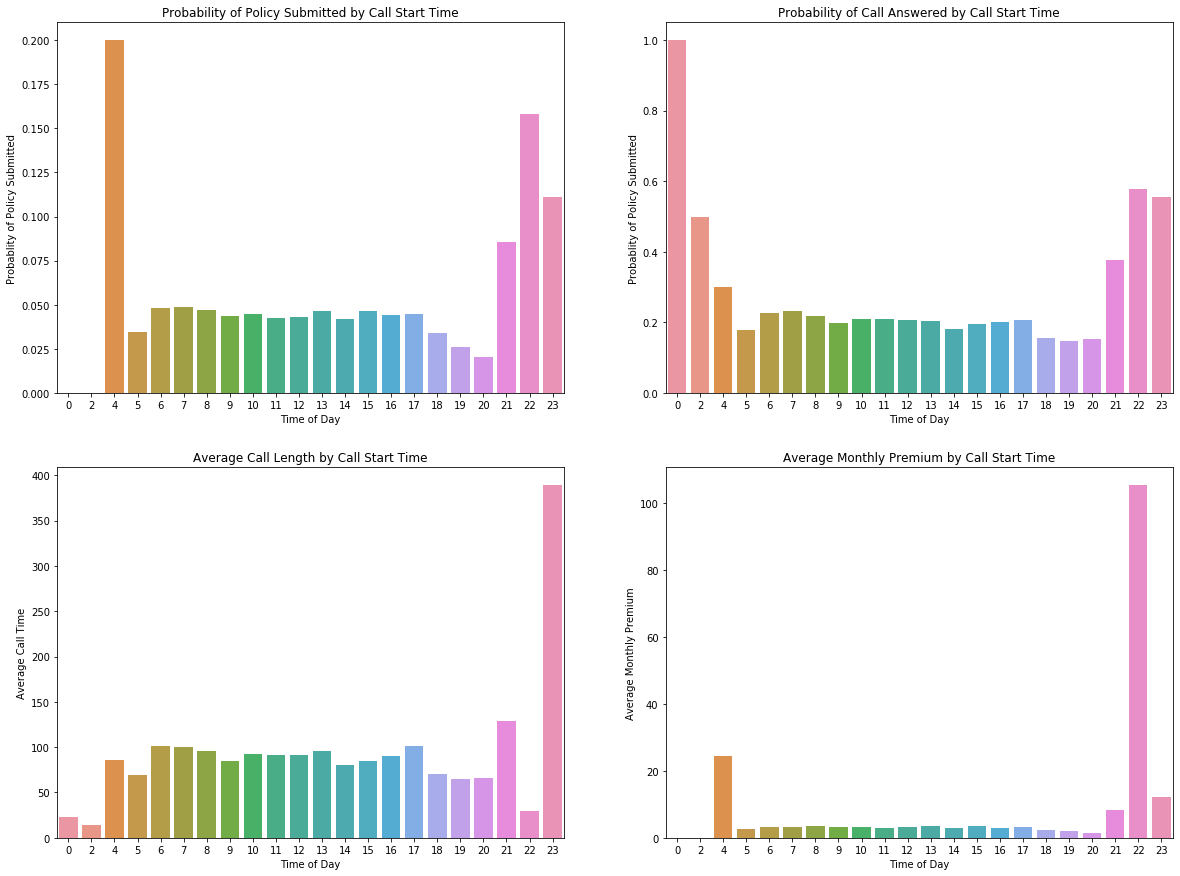

In [136]:
f, axes = plt.subplots(2, 2,  figsize=(20,15))
ln = (sns.barplot(x = 'hour_started', y = 'Policy Submitted?', data = df_time_started, ax=axes[0,0])
       .set(title='Probability of Policy Submitted by Call Start Time', xlabel='Time of Day',
            ylabel='Probablity of Policy Submitted'))

ln = (sns.barplot(x = 'hour_started', y = 'Answered', data = df_time_started, ax=axes[0,1])
       .set(title='Probability of Call Answered by Call Start Time', xlabel='Time of Day',
            ylabel='Probablity of Policy Submitted'))

ln = (sns.barplot(x = 'hour_started', y = 'Call Length (sec)', data = df_time_started, ax=axes[1,0])
       .set(title='Average Call Length by Call Start Time', xlabel='Time of Day',
            ylabel='Average Call Time'))

ln = (sns.barplot(x = 'hour_started', y = 'Policy Monthly Premium', data = df_time_started, ax=axes[1,1])
       .set(title='Average Monthly Premium by Call Start Time', xlabel='Time of Day',
            ylabel='Average Monthly Premium'))

plt.show()

#### It looks like calls are most likely to be answered, and a policy is most likely to be submitted, from the hours of 6-9 AM. If the agents are the ones calling the customers, these seem like the best hours for making calls. We can ignore the spikes at the very early and late hours of the day due to lack of data/credibility.

### Statistics given a call is answered.

In [137]:
df2 = df[df['Answered'] == 1]
df_time_started2 = (df2.groupby(['hour_started']).agg({'Call Length (sec)':'mean',
                                                       'Policy Submitted?':'mean', 'Call ID':'count',
                                                    'Policy Monthly Premium':'mean', 'Call Length (sec)':'mean'})
                   .reset_index().rename(columns={'Call ID':'Call Count'}))
df_time_started2

,hour_started,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,0,23.000000,0.000000,1,0.000000
1,2,9.000000,0.000000,1,0.000000
2,4,18.000000,0.000000,3,0.000000
3,5,237.223347,0.069501,1482,4.114204
4,6,337.519597,0.103828,4363,7.340736
5,7,318.867480,0.095771,7946,6.260498
6,8,311.609664,0.090244,8754,6.759756
7,9,291.000215,0.093455,9320,6.978164
8,10,310.716945,0.089909,9454,6.457461
9,11,308.257159,0.087928,8905,6.078972


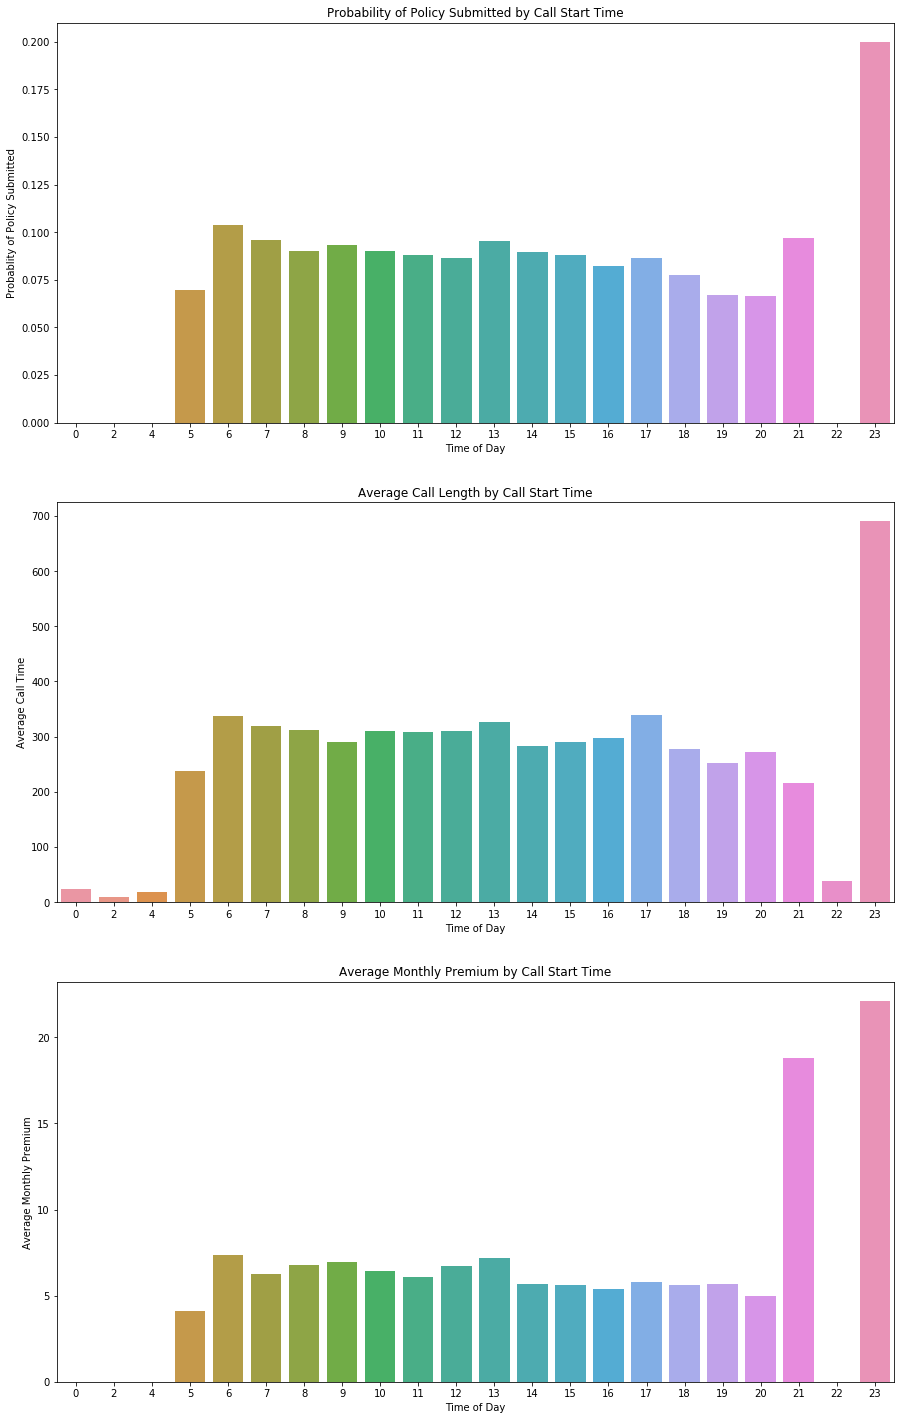

In [138]:
f, axes = plt.subplots(3, 1,  figsize=(15,25))
ln = (sns.barplot(x = 'hour_started', y = 'Policy Submitted?', data = df_time_started2, ax=axes[0])
       .set(title='Probability of Policy Submitted by Call Start Time', xlabel='Time of Day',
            ylabel='Probablity of Policy Submitted'))

ln = (sns.barplot(x = 'hour_started', y = 'Call Length (sec)', data = df_time_started2, ax=axes[1])
       .set(title='Average Call Length by Call Start Time', xlabel='Time of Day',
            ylabel='Average Call Time'))

ln = (sns.barplot(x = 'hour_started', y = 'Policy Monthly Premium', data = df_time_started2, ax=axes[2])
       .set(title='Average Monthly Premium by Call Start Time', xlabel='Time of Day',
            ylabel='Average Monthly Premium'))

plt.show()

### It looks like the between the hours of 6-8 are the best time our agents should be online to receive calls. The probability of a policy being submitted, the average call length is the highest at these times. Additionally, the average monthly premium from a call is at it's highest form 6-7 AM. As mentioned earlier, we want to ignore the spikes at the very early and late hours of the day due to lack of data.

## Most valuable states

### As is (without condition of call being answered)

In [143]:
df_states = (df.groupby(['US State of Client']).agg({'Answered':'mean', 'Call Length (sec)':'mean',
                                                       'Policy Submitted?':'mean', 'Call ID':'count',
                                                    'Policy Monthly Premium':'mean', 'Call Length (sec)':'mean'})
                   .reset_index().rename(columns={'Call ID':'Call Count'})).sort_values(by=['Answered'],
                                                                                        ascending=False).reset_index()
df_states.head(n=10)

,index,US State of Client,Answered,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,36,NY,0.712500,82.575000,0.000000,80,0.000000
1,33,NJ,0.440000,32.840000,0.000000,25,0.000000
2,38,OK,0.254888,115.518775,0.056584,5779,4.107901
3,12,GA,0.252261,105.020475,0.062543,20562,3.778358
4,41,QC,0.250000,25.750000,0.000000,4,0.000000
5,4,AZ,0.234252,103.244412,0.053737,8858,3.732683
6,28,MT,0.232033,100.531828,0.016427,487,0.764517
7,29,NC,0.228191,105.560943,0.052178,19510,3.883075
8,44,SD,0.226763,81.247858,0.031641,1517,2.094298
9,51,WA,0.226671,108.250696,0.073700,8616,4.999557


In [148]:
df_states2 = df_states.sort_values(by=['Policy Submitted?'], ascending=False).reset_index()
df_states2.head(n=10)

,level_0,index,US State of Client,Answered,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,9,51,WA,0.226671,108.250696,0.073700,8616,4.999557
1,3,12,GA,0.252261,105.020475,0.062543,20562,3.778358
2,11,34,NM,0.224677,119.797650,0.059694,4255,3.820837
3,46,13,HI,0.156200,66.407407,0.059581,621,4.052142
4,2,38,OK,0.254888,115.518775,0.056584,5779,4.107901
5,16,25,MN,0.213467,95.214900,0.054919,6282,4.418742
6,13,43,SC,0.218414,113.052083,0.054856,11904,3.292186
7,5,4,AZ,0.234252,103.244412,0.053737,8858,3.732683
8,23,26,MO,0.206150,96.965824,0.052977,13723,3.568281
9,14,46,TX,0.216795,101.580256,0.052720,44632,3.949405


#### Going based off of probablity that a call results in a policy submitted, which seems like the most important metric to me, it looks like Washington, Georgia, New Mexico, and Hawaii are the top states. New York and New Jersey are worth looking into though. They have the highest probability of calls being answered, albeit with a very small sample size, but none of them resulted in a policy being submitted. I would be curious as to why that is.

#### Now let's looks at some stats given a call is answered to see if it paints a different picture.

In [149]:
df_states3 = (df2.groupby(['US State of Client']).agg({'Call Length (sec)':'mean',
                                                       'Policy Submitted?':'mean', 'Call ID':'count',
                                                    'Policy Monthly Premium':'mean', 'Call Length (sec)':'mean'})
                   .reset_index().rename(columns={'Call ID':'Call Count'})).sort_values(by=['Policy Submitted?'],
                                                                                        ascending=False).reset_index()
df_states3.head(n=10)

,index,US State of Client,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,11,HI,228.484536,0.123711,97,12.531649
1,48,WA,337.402458,0.120840,1953,8.134921
2,31,NM,377.648536,0.111925,956,6.933755
3,24,MS,354.584615,0.110256,1560,6.575083
4,22,MN,306.764355,0.109620,1341,8.777979
5,10,GA,306.801427,0.107769,5187,6.502553
6,35,OK,342.634080,0.107264,1473,7.521229
7,46,VA,332.356634,0.106472,3090,7.684123
8,37,PA,313.035048,0.105891,4023,7.098354
9,49,WI,333.034054,0.100196,1527,6.369456


In [146]:
df_states4 = df_states.copy().sort_values(by=['Policy Monthly Premium'], ascending=False).reset_index()
df_states4.head(n=10)

,level_0,index,US State of Client,Answered,Call Length (sec),Policy Submitted?,Call Count,Policy Monthly Premium
0,9,51,WA,0.226671,108.250696,0.073700,8616,4.999557
1,19,20,LA,0.212384,92.453541,0.047015,13485,4.637687
2,16,25,MN,0.213467,95.214900,0.054919,6282,4.418742
3,18,37,OH,0.212501,100.100530,0.050764,20014,4.397813
4,2,38,OK,0.254888,115.518775,0.056584,5779,4.107901
5,46,13,HI,0.156200,66.407407,0.059581,621,4.052142
6,14,46,TX,0.216795,101.580256,0.052720,44632,3.949405
7,7,29,NC,0.228191,105.560943,0.052178,19510,3.883075
8,11,34,NM,0.224677,119.797650,0.059694,4255,3.820837
9,3,12,GA,0.252261,105.020475,0.062543,20562,3.778358


#### Given that a call is answered, Hawaii, Washington, and New Mexico are the most likely to result in a policy being submitted. The possibility for Georgia is a little lower (but still 6th), this tells us the higher likelihood of a call being accepted in Georgia is relevant here. We should look into the average experience in Georgia compared to the other 3 states to see if that's driving the lower conversion rate. But overall, this reinforces the 4 picks layed out earlier. We should focus on Washington, Georiga, New Mexico, and Hawaii.